### **MNIST dataset classification using Logistic regression method in Pytorch Framework**

In [1]:
'''importing libraries'''

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

from torch.utils.data import random_split

**Dataset**

In [2]:
'''downloading the training dataset using torchvision'''

dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                     download=True, transform=transforms.Compose([transforms.ToTensor()]))  # downloading the transforms the PIL data into tensor

In [3]:
'''split the dataset into training and validation dataset'''

train_set, val_set = random_split(dataset, [50000,10000])
print(len(train_set))
print(len(val_set))

50000
10000


**Exploration of dataset**

In [4]:
sample = next(iter(train_set))

image, label = sample
print(image.shape)

torch.Size([1, 28, 28])


Label:  8


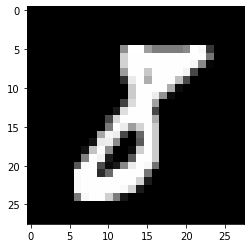

In [5]:
# display the image
plt.imshow(image.squeeze(), cmap='gray')
print('Label: ',label)

**Model class**

In [6]:
def accuracy(preds, labels):
  return(preds.argmax(dim=1).eq(labels).sum().item()/ len(preds))  # per batch accuracy


In [7]:
'''creating the model class by extending the nn.Module class of pytorch'''

class model_MNIST(nn.Module):

  def __init__(self) -> None:
      super().__init__()
      # network layer as class attributes
      self.fc1 = nn.Linear(in_features=784, out_features=10)

  def forward(self, t):
    t = t.flatten(start_dim=1)    # flatten the input tensor [batch,channels,height,width]--->[batch, channels*height*width]
    t = self.fc1(t)
    return t

In [11]:
'''define the fit function'''

def fit(epochs, lr, batch_size,model, train_set, val_set, opt_func = optim.SGD):
  
  train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
  val_loader = torch.utils.data.DataLoader(val_set,batch_size=batch_size)

  optimizer = opt_func(model.parameters(),lr)

  epoch_train_loss = []
  epoch_train_acc = []

  epoch_val_loss = []
  epoch_val_acc = []


  for epoch in range(epochs):
    train_loss = []
    train_acc = []
    val_loss = []
    val_acc = []

    for batch in train_loader:
      images, labels = batch
      preds = model(images)
      loss = F.cross_entropy(preds, labels)
      acc = accuracy(preds,labels)
      train_loss.append(loss.item())
      train_acc.append(acc)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    for batch in val_loader:
      images, labels = batch
      preds = model(images)
      loss = F.cross_entropy(preds,labels)
      acc = accuracy(preds, labels)
      val_loss.append(loss.item())
      val_acc.append(acc)

    print(f'Epoch{epoch+1}, Val_loss:{torch.Tensor(val_loss).mean().item()}, val_acc:{torch.Tensor(val_acc).mean().item()} ')

    epoch_val_loss.append(torch.Tensor(val_loss).mean().item())
    epoch_val_acc.append(torch.Tensor(val_acc).mean().item())
    epoch_train_loss.append(torch.Tensor(train_loss).mean().item())
    epoch_train_acc.append(torch.Tensor(train_acc).mean().item())

  return{'train_loss': epoch_train_loss,'\t' 'train_acc':epoch_train_acc,'t' 'val_loss': epoch_val_loss,'\t' 'val_acc': epoch_val_acc}
    

In [12]:
network = model_MNIST()

history = fit(10,.001,128,network,train_set,val_set)

Epoch1, Val_loss:1.9696916341781616, val_acc:0.5701147317886353 
Epoch2, Val_loss:1.6977477073669434, val_acc:0.7102452516555786 
Epoch3, Val_loss:1.493065595626831, val_acc:0.7513844966888428 
Epoch4, Val_loss:1.3378479480743408, val_acc:0.7764042615890503 
Epoch5, Val_loss:1.2182223796844482, val_acc:0.7939082384109497 
Epoch6, Val_loss:1.1241344213485718, val_acc:0.8045886158943176 
Epoch7, Val_loss:1.0487116575241089, val_acc:0.813093364238739 
Epoch8, Val_loss:0.9870594143867493, val_acc:0.8199169039726257 
Epoch9, Val_loss:0.9357427954673767, val_acc:0.8239715099334717 
Epoch10, Val_loss:0.8924921751022339, val_acc:0.8284216523170471 


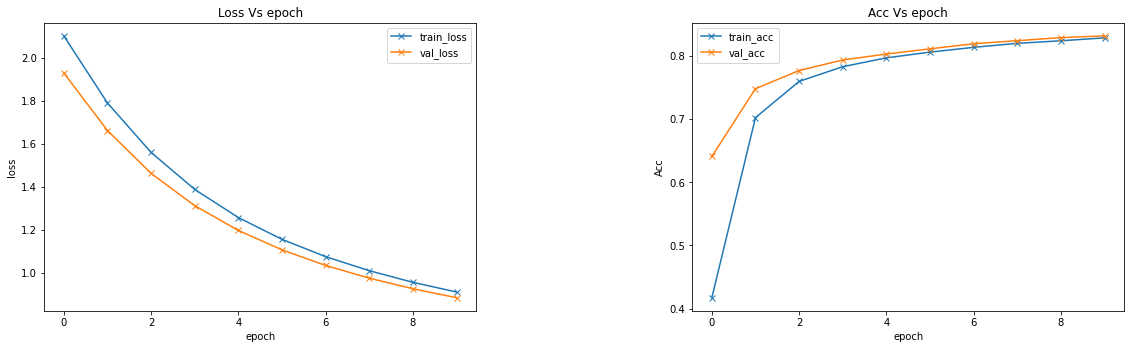

In [10]:
'''plotting the results'''

fig = plt.figure()
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(history['train_loss'],'-x', label='train_loss')
ax1.plot(history['val_loss'],'-x', label='val_loss')
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_title('Loss Vs No of epoch')
ax1.legend(loc=0)

ax2 = fig.add_axes([1.5,0,1,1])
ax2.plot(history['train_acc'],'-x', label='train_acc')
ax2.plot(history['val_acc'],'-x', label='val_acc')
ax2.legend(loc=0)
ax2.set_xlabel('epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy Vs No of epoch')
plt.show()

**Testing model on the test dataset**

In [27]:
'''defining the predict_test_image function'''

def predict_test_image(image, model):
  image = image.unsqueeze(dim=0)   # converting the image shape into [batch,channels, height, width]
  pred = model(image)

  return pred.argmax(dim=1).item()

Correct Label: 7 Predicted Label:  7


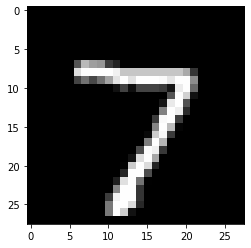

In [30]:
'''downloading the checking the sample of the test dataset'''

test_dataset = torchvision.datasets.MNIST(root='./data', train=False,download = True, transform=transforms.Compose([transforms.ToTensor()]))
test_sample = next(iter(test_dataset))
image, label = test_sample

plt.imshow(image.squeeze(),cmap='gray');
print('Correct Label:', label, 'Predicted Label: ', predict_test_image(image,network))

*Test Example*

Correct Label: 0 Predicted Label:  0


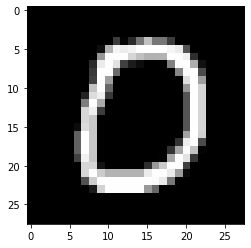

In [38]:
# Incorrect Predication by model
test_example = test_dataset[10]
image, label = test_example

plt.imshow(image.squeeze(),cmap='gray');
print('Correct Label:', label, 'Predicted Label: ', predict_test_image(image,network))

Correct Label: 0 Predicted Label:  8


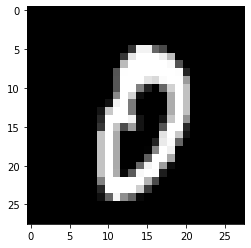

In [39]:
# Incorrect Predication by model
test_example = test_dataset[346]
image, label = test_example

plt.imshow(image.squeeze(),cmap='gray');
print('Correct Label:', label, 'Predicted Label: ', predict_test_image(image,network))